# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Importing the dataset

In [2]:
data=pd.read_csv('goldstock.csv')

In [3]:
data

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,19-01-2024,2029.3,166078,2027.4,2041.9,2022.2
1,1,18-01-2024,2021.6,167013,2009.1,2025.6,2007.7
2,2,17-01-2024,2006.5,245194,2031.7,2036.1,2004.6
3,3,16-01-2024,2030.2,277995,2053.4,2062.8,2027.6
4,4,12-01-2024,2051.6,250946,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,28-01-2014,1250.5,81426,1254.9,1261.9,1248.0
2507,2529,27-01-2014,1263.5,63419,1269.9,1280.1,1252.0
2508,2530,24-01-2014,1264.5,34998,1264.3,1273.2,1256.9
2509,2531,23-01-2014,1262.5,41697,1235.1,1267.1,1230.8


# Splitting a date column into separate day month year columns

In [4]:
df=pd.DatetimeIndex(data['Date'])

In [5]:
data['Day']=df.day
data['Month']=df.month
data['Year']=df.year

In [6]:
data

,Unnamed: 0,Date,Close,Volume,Open,High,Low,Day,Month,Year
0,0,19-01-2024,2029.3,166078,2027.4,2041.9,2022.2,19,1,2024
1,1,18-01-2024,2021.6,167013,2009.1,2025.6,2007.7,18,1,2024
2,2,17-01-2024,2006.5,245194,2031.7,2036.1,2004.6,17,1,2024
3,3,16-01-2024,2030.2,277995,2053.4,2062.8,2027.6,16,1,2024
4,4,12-01-2024,2051.6,250946,2033.2,2067.3,2033.1,1,12,2024
...,...,...,...,...,...,...,...,...,...,...
2506,2528,28-01-2014,1250.5,81426,1254.9,1261.9,1248.0,28,1,2014
2507,2529,27-01-2014,1263.5,63419,1269.9,1280.1,1252.0,27,1,2014
2508,2530,24-01-2014,1264.5,34998,1264.3,1273.2,1256.9,24,1,2014
2509,2531,23-01-2014,1262.5,41697,1235.1,1267.1,1230.8,23,1,2014


In [7]:
data.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

In [8]:
data

,Close,Volume,Open,High,Low,Day,Month,Year
0,2029.3,166078,2027.4,2041.9,2022.2,19,1,2024
1,2021.6,167013,2009.1,2025.6,2007.7,18,1,2024
2,2006.5,245194,2031.7,2036.1,2004.6,17,1,2024
3,2030.2,277995,2053.4,2062.8,2027.6,16,1,2024
4,2051.6,250946,2033.2,2067.3,2033.1,1,12,2024
...,...,...,...,...,...,...,...,...
2506,1250.5,81426,1254.9,1261.9,1248.0,28,1,2014
2507,1263.5,63419,1269.9,1280.1,1252.0,27,1,2014
2508,1264.5,34998,1264.3,1273.2,1256.9,24,1,2014
2509,1262.5,41697,1235.1,1267.1,1230.8,23,1,2014


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2511 non-null   float64
 1   Volume  2511 non-null   int64  
 2   Open    2511 non-null   float64
 3   High    2511 non-null   float64
 4   Low     2511 non-null   float64
 5   Day     2511 non-null   int32  
 6   Month   2511 non-null   int32  
 7   Year    2511 non-null   int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 127.6 KB


In [10]:
data.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low', 'Day', 'Month', 'Year'], dtype='object')

In [11]:
data['Year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

# Data Correlation analysis

In [12]:
cors=data.drop(['Year','Month','Day'],axis=1)

In [13]:
cors

,Close,Volume,Open,High,Low
0,2029.3,166078,2027.4,2041.9,2022.2
1,2021.6,167013,2009.1,2025.6,2007.7
2,2006.5,245194,2031.7,2036.1,2004.6
3,2030.2,277995,2053.4,2062.8,2027.6
4,2051.6,250946,2033.2,2067.3,2033.1
...,...,...,...,...,...
2506,1250.5,81426,1254.9,1261.9,1248.0
2507,1263.5,63419,1269.9,1280.1,1252.0
2508,1264.5,34998,1264.3,1273.2,1256.9
2509,1262.5,41697,1235.1,1267.1,1230.8


<Axes: >

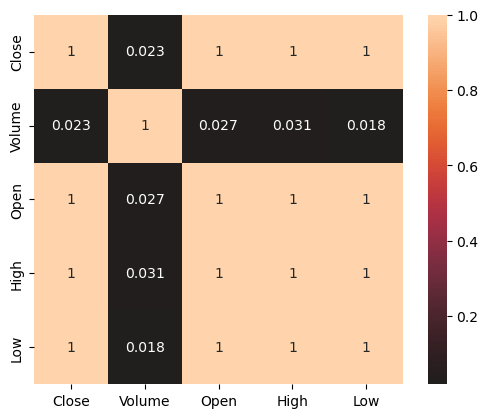

In [14]:
sns.heatmap(cors.corr(),center=0,annot=True,square=True)

In [15]:
data

,Close,Volume,Open,High,Low,Day,Month,Year
0,2029.3,166078,2027.4,2041.9,2022.2,19,1,2024
1,2021.6,167013,2009.1,2025.6,2007.7,18,1,2024
2,2006.5,245194,2031.7,2036.1,2004.6,17,1,2024
3,2030.2,277995,2053.4,2062.8,2027.6,16,1,2024
4,2051.6,250946,2033.2,2067.3,2033.1,1,12,2024
...,...,...,...,...,...,...,...,...
2506,1250.5,81426,1254.9,1261.9,1248.0,28,1,2014
2507,1263.5,63419,1269.9,1280.1,1252.0,27,1,2014
2508,1264.5,34998,1264.3,1273.2,1256.9,24,1,2014
2509,1262.5,41697,1235.1,1267.1,1230.8,23,1,2014


# Gold stock highest price for yearly wise

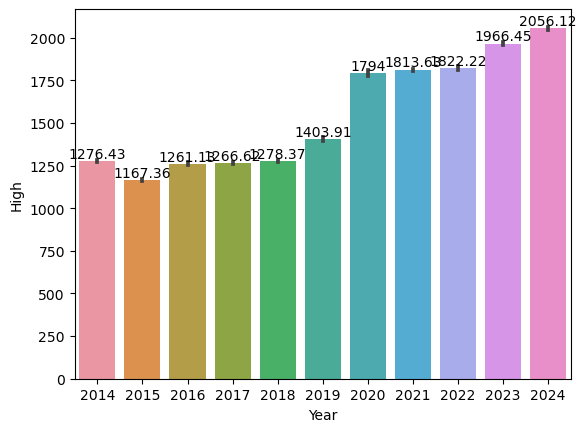

In [16]:
count=sns.barplot(x=data['Year'],y=data['High'])
for container in count.containers:
    count.bar_label(container)

# Gold stock price buyer's for yearly wise

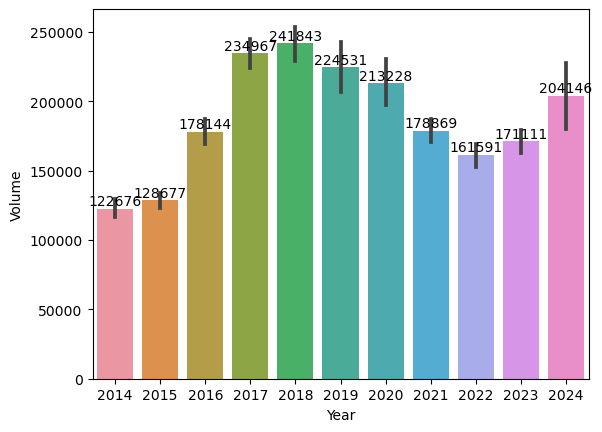

In [17]:
count=sns.barplot(x=data['Year'],y=data['Volume'])
for container in count.containers:
    count.bar_label(container)

# Gold stock opening price for yearly wise

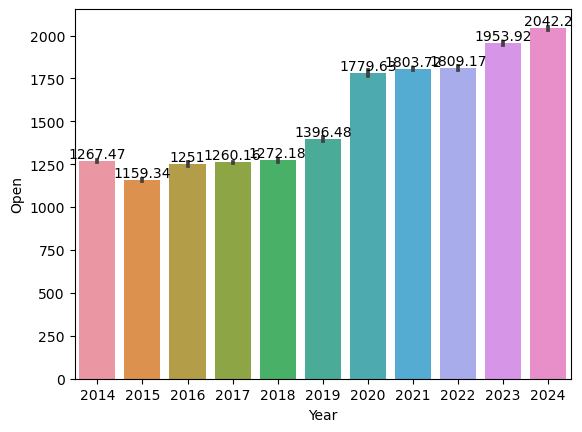

In [18]:
count=sns.barplot(x=data['Year'],y=data['Open'])
for container in count.containers:
    count.bar_label(container)

# Gold stock closing price for yearly wise

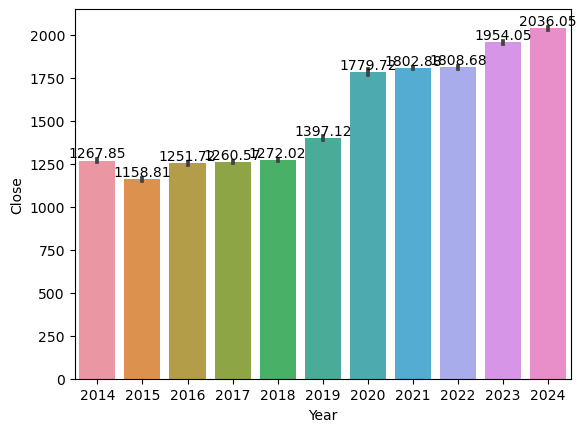

In [19]:
count=sns.barplot(x=data['Year'],y=data['Close'])
for container in count.containers:
    count.bar_label(container)

# Gold stock lowest price for yearly wise

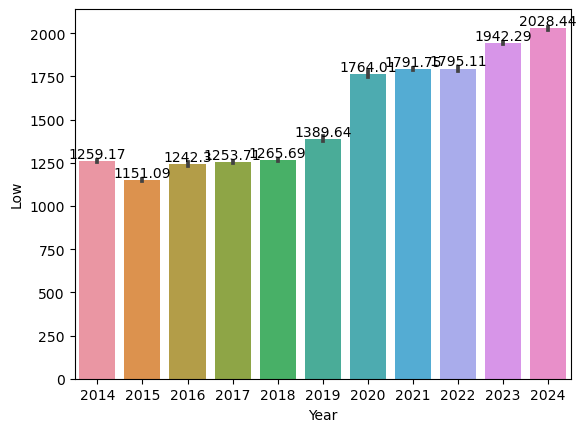

In [20]:
count=sns.barplot(x=data['Year'],y=data['Low'])
for container in count.containers:
    count.bar_label(container)

# Splitting the dataset into the training set and test set 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
feature=data.drop('Close',axis=1)

In [23]:
target=data['Close']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2)

In [25]:
x_train

,Volume,Open,High,Low,Day,Month,Year
582,139900,1765.5,1782.8,1758.3,21,9,2021
1997,168259,1156.7,1157.9,1139.7,2,4,2016
1174,241040,1298.0,1301.7,1293.6,15,5,2019
1008,16,1551.2,1558.8,1545.4,1,10,2020
2020,53272,1060.6,1062.7,1056.5,31,12,2015
...,...,...,...,...,...,...,...
740,269731,1834.5,1835.7,1784.6,2,4,2021
500,347305,1818.7,1822.9,1804.7,18,1,2022
837,287073,1961.4,1983.8,1957.2,16,9,2020
1572,258782,1290.7,1295.9,1286.8,10,11,2017


In [26]:
y_train

582     1778.2
1997    1157.5
1174    1297.8
1008    1557.5
2020    1060.2
         ...  
740     1791.2
500     1812.4
837     1970.5
1572    1288.9
1348    1206.7
Name: Close, Length: 2008, dtype: float64

In [27]:
x_test

,Volume,Open,High,Low,Day,Month,Year
1177,227237,1285.0,1290.3,1283.9,5,10,2019
537,146754,1808.7,1815.2,1784.3,23,11,2021
2482,130176,1350.0,1352.9,1331.2,3,4,2014
1467,247027,1326.7,1330.5,1321.7,14,3,2018
1106,238972,1518.4,1518.4,1506.5,21,8,2019
...,...,...,...,...,...,...,...
1799,224970,1221.8,1231.4,1218.6,15,11,2016
1308,218624,1231.9,1232.5,1221.4,30,10,2018
1362,363069,1218.4,1221.4,1198.6,13,8,2018
955,144290,1663.4,1673.6,1632.0,30,3,2020


In [28]:
y_test

1177    1287.4
537     1786.3
2482    1337.9
1467    1325.6
1106    1515.7
         ...  
1799    1224.5
1308    1225.3
1362    1198.9
955     1643.2
1015    1519.5
Name: Close, Length: 503, dtype: float64

# Fitting linear regression to the training set

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
Ir=LinearRegression()

In [31]:
model=Ir.fit(x_train,y_train)

# Predicting the test set results

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([1287.8730049 , 1795.99443048, 1338.83750318, 1325.94680509,
       1509.91319522, 1287.86546647, 1261.53579768, 1209.56351435,
       1265.01838094, 1269.13602502, 1750.43731523, 1979.64252659,
       1145.25407552, 1861.72580244, 1712.47798348, 1883.9835691 ,
       1312.60856718, 1312.89489662, 1146.60559421, 1778.24329847,
       1792.88001099, 1795.65481312, 1172.37169253, 1225.69857007,
       1807.04127153, 1803.97314236, 1809.78728134, 1821.28131235,
       1257.0490683 , 1808.12773535, 1329.06101156, 1518.5372355 ,
       1328.68133285, 1806.41535085, 1302.01019037, 1258.42870677,
       1320.94153171, 1184.82064484, 1915.13800919, 1222.01842891,
       1207.27269504, 1289.46428776, 1162.07738775, 1945.18906215,
       1252.5824722 , 1231.91740132, 1965.76010389, 1287.0732346 ,
       1255.51530001, 1864.51516114, 1253.00899561, 1577.22422849,
       1283.14153572, 1321.42878283, 1778.63068925, 1309.88595608,
       2015.9102411 , 1751.11293978, 1950.79290306, 1936.60264

In [34]:
len(y_pred)

503

# Machine performance score

In [35]:
model.score(x_test,y_pred)

1.0

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
print('mean_squared_error:',mean_squared_error(y_test,y_pred))

mean_squared_error: 29.908880672629632


In [38]:
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.9996479652735213


In [39]:
r2=0.9996391434077757
p=1
n=len(y_test)

In [40]:
adjusted_r2=1-((1-r2)*(1-n))/(n-p-1)

In [41]:
print('adjusted_r2:',adjusted_r2)

adjusted_r2: 1.0003615768648635


In [42]:
x_test


,Volume,Open,High,Low,Day,Month,Year
1177,227237,1285.0,1290.3,1283.9,5,10,2019
537,146754,1808.7,1815.2,1784.3,23,11,2021
2482,130176,1350.0,1352.9,1331.2,3,4,2014
1467,247027,1326.7,1330.5,1321.7,14,3,2018
1106,238972,1518.4,1518.4,1506.5,21,8,2019
...,...,...,...,...,...,...,...
1799,224970,1221.8,1231.4,1218.6,15,11,2016
1308,218624,1231.9,1232.5,1221.4,30,10,2018
1362,363069,1218.4,1221.4,1198.6,13,8,2018
955,144290,1663.4,1673.6,1632.0,30,3,2020


# Output

In [43]:
print('close:',model.predict([[1200000,2331.9,2432.7,1907.5,10,3,2024]]))

close: [2097.89135813]


D:\Mani\VDO\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
